## 1)import libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2) read dataset

In [27]:
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


## 3) data preprocessing

In [28]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [29]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

In [30]:
df['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [31]:
# see count of each unique values
#count = df.groupby('paymentMethod').value_counts()
#count

In [32]:
#df = df[df['paymentMethod'] != 'storecredit']
#df

In [33]:
df['paymentMethod'] = df['paymentMethod'].map({'paypal':0,'storecredit':0,'creditcard':1})
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,0,0.000000,0
2,845,1,4.921318,1,0.000000,0
3,503,1,4.886641,1,0.000000,0
4,2000,1,5.040929,1,0.000000,0


# 4)split dataset into dependent and independent features

In [34]:
x = df[['accountAgeDays', 'localTime', 'paymentMethod', 'paymentMethodAgeDays']]
x

,accountAgeDays,localTime,paymentMethod,paymentMethodAgeDays
0,29,4.745402,0,28.204861
1,725,4.742303,0,0.000000
2,845,4.921318,1,0.000000
3,503,4.886641,1,0.000000
4,2000,5.040929,1,0.000000
...,...,...,...,...
39216,986,4.836982,1,0.000000
39217,1647,4.876771,1,377.930556
39218,1591,4.742303,1,0.000000
39219,237,4.921318,1,236.082639


In [35]:
y = df['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
39216    0
39217    0
39218    0
39219    0
39220    0
Name: label, Length: 39221, dtype: int64

In [36]:
x.shape

(39221, 4)

In [37]:
y.shape

(39221,)

# 5)train,test,split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [41]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [42]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [43]:
classifier_regressor.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [44]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [45]:
print(classifier_regressor.best_score_)

1.0


In [46]:
##prediction
y_pred = classifier_regressor.predict(x_test)

In [47]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [48]:
score = accuracy_score(y_pred, y_test)
print(score)

1.0


In [49]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7727
           1       1.00      1.00      1.00       118

    accuracy                           1.00      7845
   macro avg       1.00      1.00      1.00      7845
weighted avg       1.00      1.00      1.00      7845



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

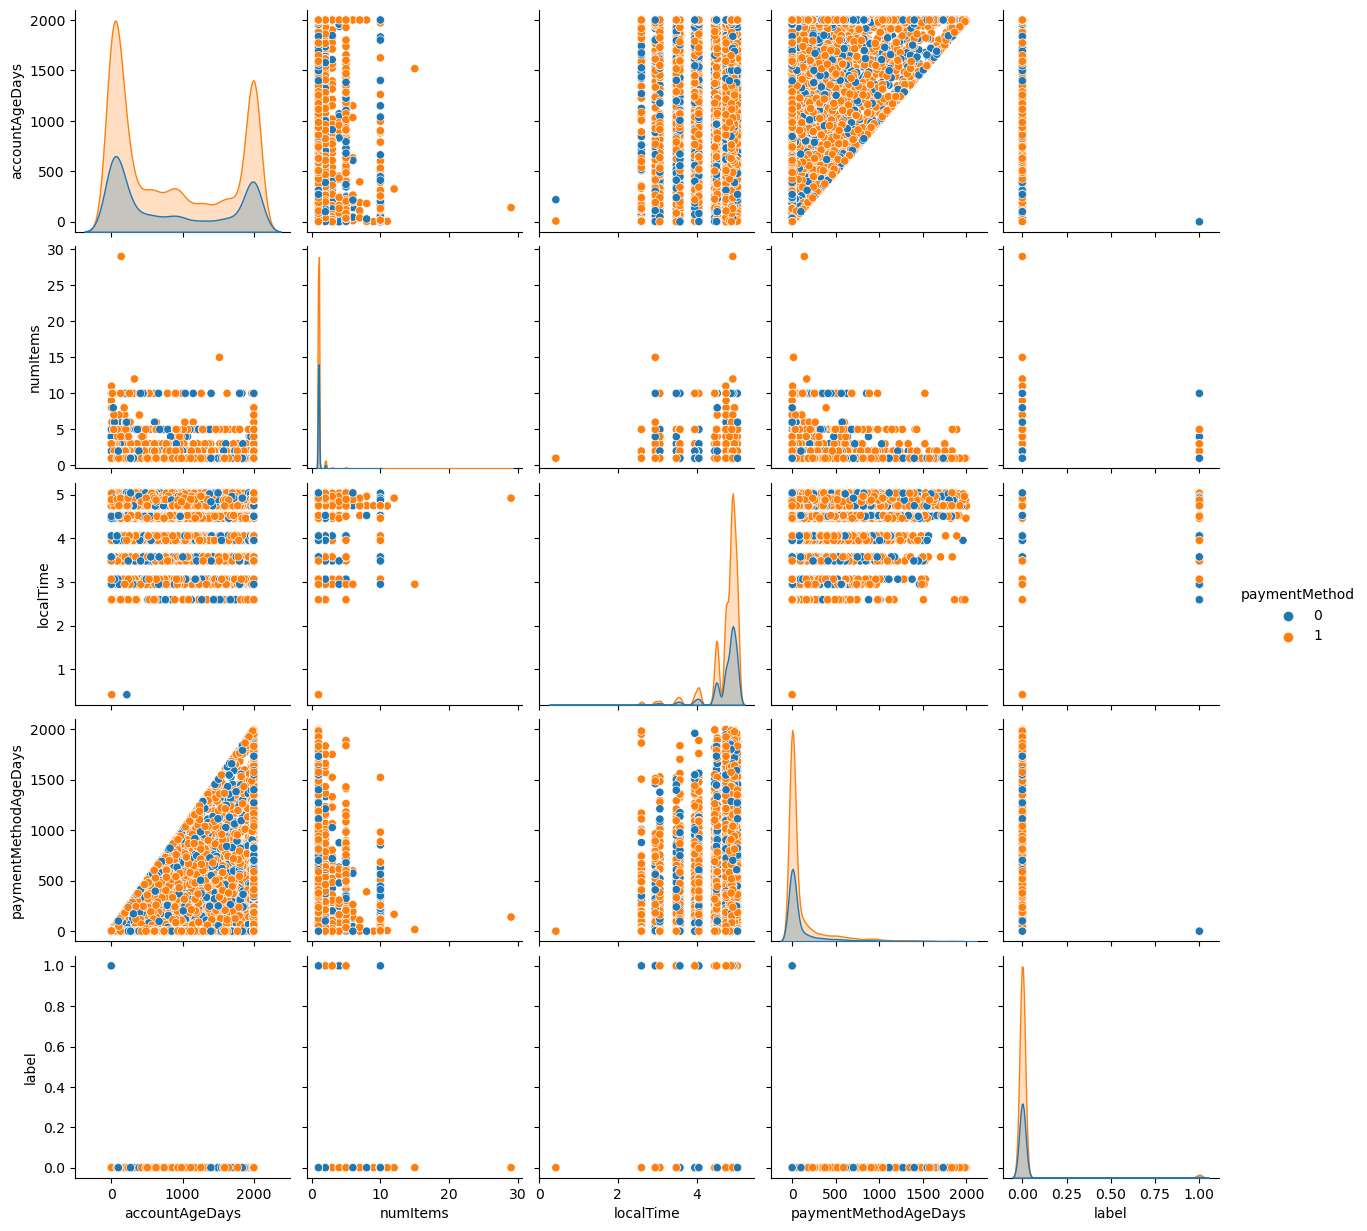

In [50]:
## EDA
sns.pairplot(df,hue='paymentMethod')